In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost as xgb
import math
import csv
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [15]:
train_a = pd.read_parquet('../A/train_targets.parquet')
train_b = pd.read_parquet('../B/train_targets.parquet')
train_c = pd.read_parquet('../C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('../A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('../A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../C/X_test_estimated.parquet')

# PLAN

## FOR X set

Add column for location, and if it is estimated data. Add them sequentially under eachother

## FOR Y set
Sequenttly under eacher other. Normalize. Must be able to denormalize. NaN values? Use A values.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
scaler_c = MinMaxScaler()

train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

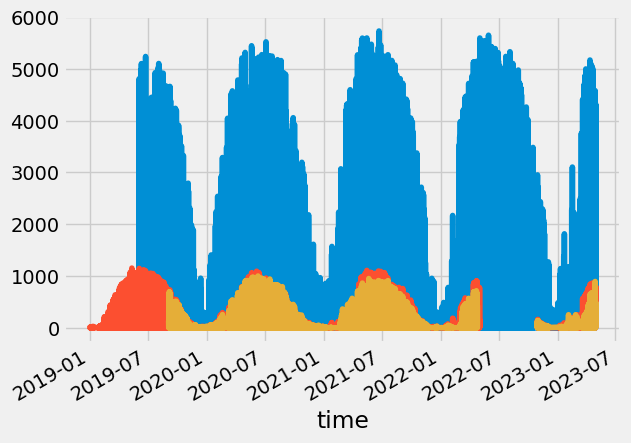

In [17]:
train_a['pv_measurement'].plot()
train_b['pv_measurement'].plot()
train_c['pv_measurement'].plot()
plt.show()

In [18]:
train_a['pv_measurement'] = scaler_a.fit_transform(train_a[['pv_measurement']])
train_b['pv_measurement'] = scaler_b.fit_transform(train_b[['pv_measurement']])
train_c['pv_measurement'] = scaler_c.fit_transform(train_c[['pv_measurement']])

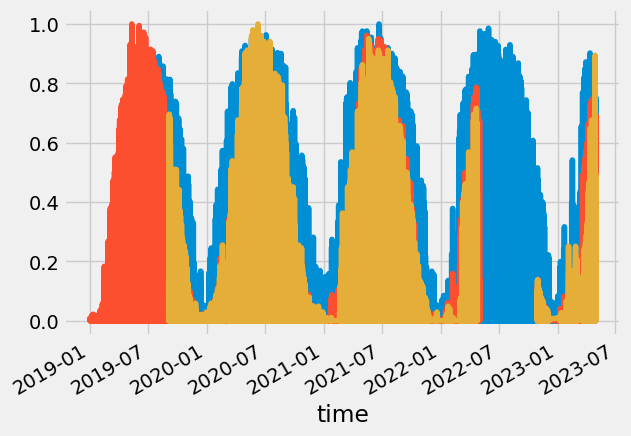

In [19]:
train_a['pv_measurement'].plot()
train_b['pv_measurement'].plot()
train_c['pv_measurement'].plot()
plt.show()

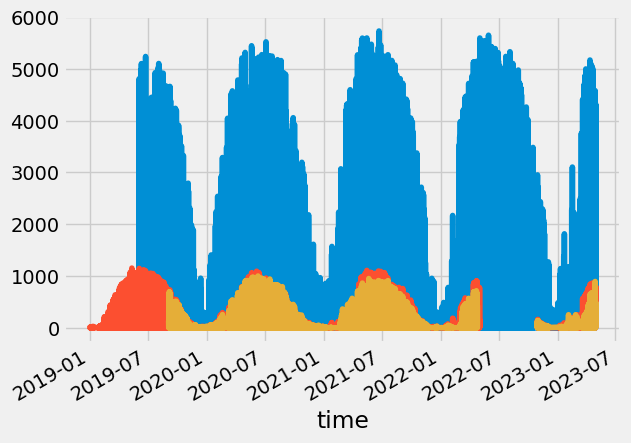

In [20]:
train_a['pv_measurement'] = scaler_a.inverse_transform(train_a[['pv_measurement']])
train_b['pv_measurement'] = scaler_b.inverse_transform(train_b[['pv_measurement']])
train_c['pv_measurement'] = scaler_c.inverse_transform(train_c[['pv_measurement']])

train_a['pv_measurement'].plot()
train_b['pv_measurement'].plot()
train_c['pv_measurement'].plot()
plt.show()

## THE NORMALIZING/DENORMALIZING WORKS!!!